# import the required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

In [2]:
# Read the CSV file
df = pd.read_csv("data/lc120.csv")

## These are the information I could find regarding the meaning of each column.
Gaze data from a LC Technologies binocular eyetracker at 120 Hz.

- status : signal status, 
- pupil : pupil size
- x : horizontal gaze location
- y : vertical gaze location
- field: field/camera number
- timestamp: time stamp.

Source: https://github.com/RyanHope/gazetools/blob/master/man/lc120.Rd


# 1. Firts, let's look at the gaze data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247145 entries, 0 to 247144
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   status     247145 non-null  int64  
 1   pupil      247145 non-null  int64  
 2   x          247145 non-null  int64  
 3   y          247145 non-null  int64  
 4   field      247145 non-null  int64  
 5   timestamp  247145 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 11.3 MB


In [4]:
# Get summary statistics for numeric columns
df.describe()

,status,pupil,x,y,field,timestamp
count,247145.000000,247145.000000,247145.000000,247145.000000,247145.000000,247145.000000
mean,0.957438,37.909806,456.614348,467.063764,0.500002,123573.123219
std,0.201868,11.413556,137.520961,140.879292,0.500001,71344.947602
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,30.000000,439.000000,451.000000,0.000000,61787.000000
50%,1.000000,37.000000,464.000000,484.000000,1.000000,123573.000000
75%,1.000000,45.000000,510.000000,515.000000,1.000000,185359.000000
max,1.000000,90.000000,780.000000,899.000000,1.000000,247146.000000


### The mean of 1 and the maximum value of 90 for the pupil column, as well as the minimum x and y positions of 1.00000, indicate that there may be outliers in the data. However, for now, we will ignore them.


In [5]:
df.head()

,status,pupil,x,y,field,timestamp
0,1,38,481,411,1,216703.0
1,1,34,481,409,0,216714.0
2,1,38,479,421,1,216726.0
3,1,34,478,413,0,216736.0
4,1,38,477,412,1,216748.0


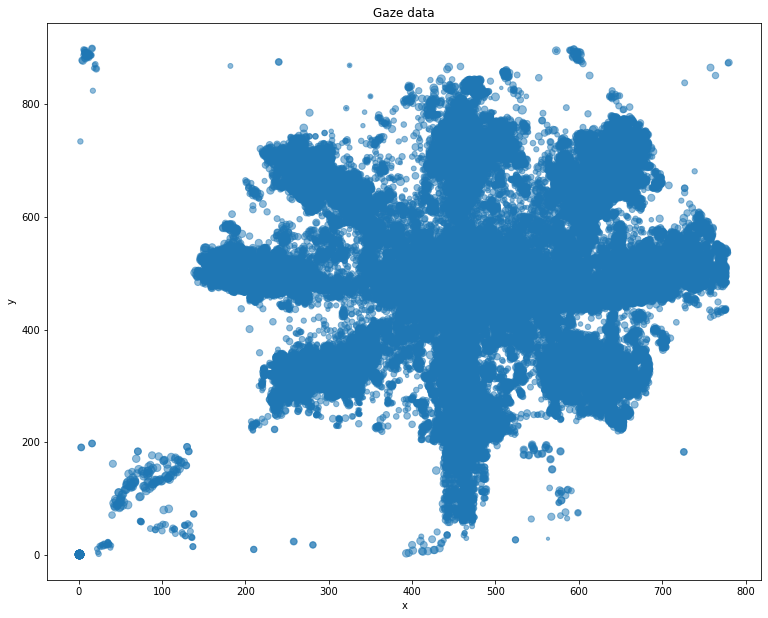

In [6]:
# Let's plot the raw data
fig, ax = plt.subplots(figsize=(1280/100, 1024/100))
ax.scatter(df['x'], df['y'], s=df['pupil'], alpha=0.5)

# Set titles and axis labels 
ax.set_title('Gaze data')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

plt.show()


# 1.1 I don't know what the "status" column means, so let's investigate this parameter!


In [7]:
# Filter rows where status is not 1
df_not_1 = df[df['status'] != 1]
df_not_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10519 entries, 339 to 247078
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     10519 non-null  int64  
 1   pupil      10519 non-null  int64  
 2   x          10519 non-null  int64  
 3   y          10519 non-null  int64  
 4   field      10519 non-null  int64  
 5   timestamp  10519 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 575.3 KB


In [8]:
# Get summary statistics for numeric columns
df.describe()

,status,pupil,x,y,field,timestamp
count,247145.000000,247145.000000,247145.000000,247145.000000,247145.000000,247145.000000
mean,0.957438,37.909806,456.614348,467.063764,0.500002,123573.123219
std,0.201868,11.413556,137.520961,140.879292,0.500001,71344.947602
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,30.000000,439.000000,451.000000,0.000000,61787.000000
50%,1.000000,37.000000,464.000000,484.000000,1.000000,123573.000000
75%,1.000000,45.000000,510.000000,515.000000,1.000000,185359.000000
max,1.000000,90.000000,780.000000,899.000000,1.000000,247146.000000


In [9]:
df_not_1.head()

,status,pupil,x,y,field,timestamp
339,0,33,552,525,0,220432.0
340,0,36,1,1,1,220443.0
341,0,33,1,1,0,220455.0
342,0,36,1,1,1,220465.0
343,0,33,1,1,0,220477.0


In [10]:
print(f"In around {len(df_not_1)/len(df)*100:0.3}% of data the staus is 0, I have no clue what does the status column mean:)")

In around 4.26% of data the staus is 0, I have no clue what does the status column mean:)


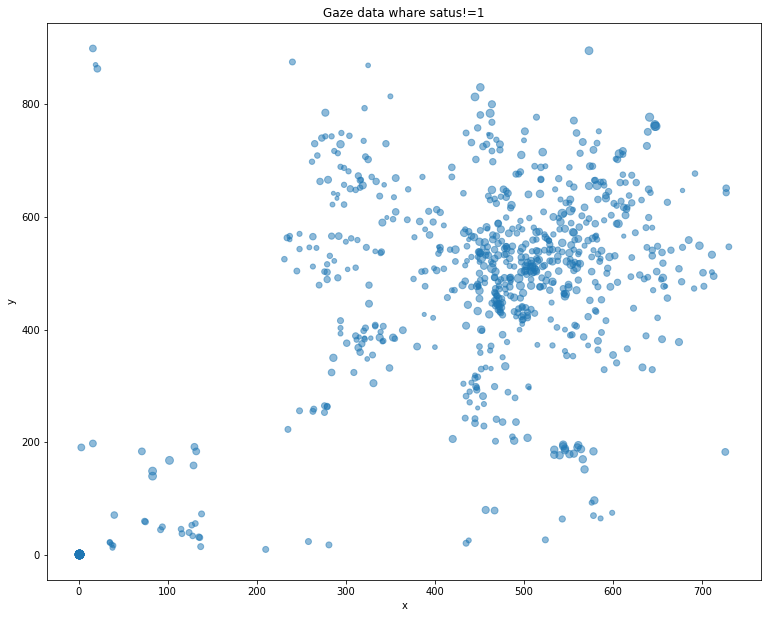

In [11]:
# Let's plot the data where the satus code is not equal to 1
fig, ax = plt.subplots(figsize=(1280/100, 1024/100))
ax.scatter(df_not_1['x'], df_not_1['y'], s=df_not_1['pupil'], alpha=0.5)

# Set titles and axis labels 
ax.set_title('Gaze data whare satus!=1')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

##  I cannot see any patterns at all, so lets keep the data with status code 0 and 1

# 1.2 Now let's investigate the "field" column

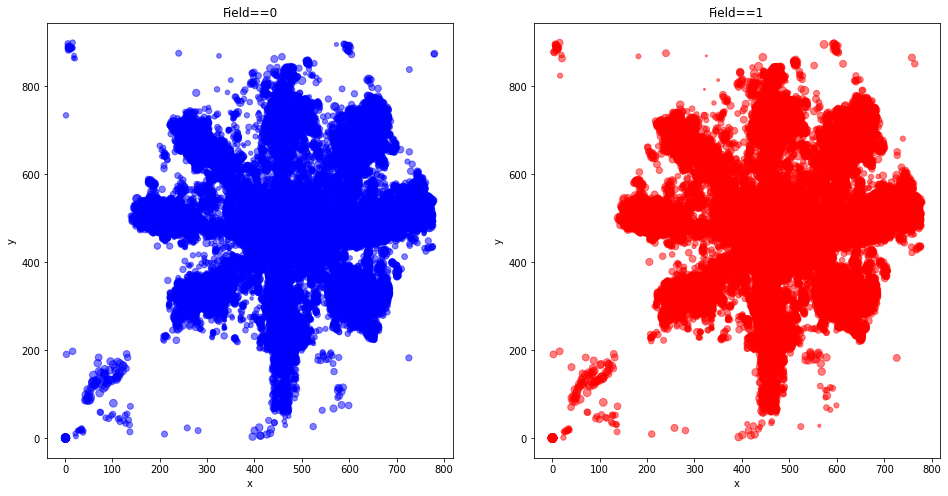

In [12]:
# Separate the data into two DataFrames based on the value of 'field' column
df_field0 = df[df['field'] == 0]
df_field1 = df[df['field'] == 1]


# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,8))

# Create scatter plots for each field value on separate subplots
ax1.scatter(df_field0['x'], df_field0['y'], s=df_field0['pupil'], alpha=0.5, color='blue')
ax2.scatter(df_field1['x'], df_field1['y'], s=df_field1['pupil'], alpha=0.5, color='red')

# Set titles and axis labels for each subplot
ax1.set_title('Field==0')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.set_title('Field==1')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()


## The pattern of the data is completely the same! so I'm going to ignore this column.

# 2. Extracting the Fixations

Let's find the fixations from the raw gaze data, I don't want to learn a new library
and i want to play with the gaze data a bit more, so I'm going to use a simple 
threshold based method

We know this about fixations:

Fixations general knowledge from literature review
+ Goldberg et al. - fixations rarely < 100ms and range between 200ms and 400ms in
duration (Irwin, 1992 - fixations dependent on task between 150ms - 600ms)
+ Very short fixations are considered not meaningful for studying behavior
- eye+brain require time for info to be registered (see Munn et al. APGV, 2008)
+ Fixations are rarely longer than 800ms in duration
- Smooth Pursuit is exception and different motif
- If we do not set a maximum duration, we will also detect smooth pursuit (which
is acceptable since we compensate for VOR)

Source: https://github.com/pupil-labs/pupil/blob/master/pupil_src/shared_modules/fixation_detector.py

And I guess it's better to convert x,y positions to angle movements.
So let's calculate the eye movements in angles using the formula presented in this weblog:
https://www.sr-research.com/eye-tracking-blog/background/visual-angle/


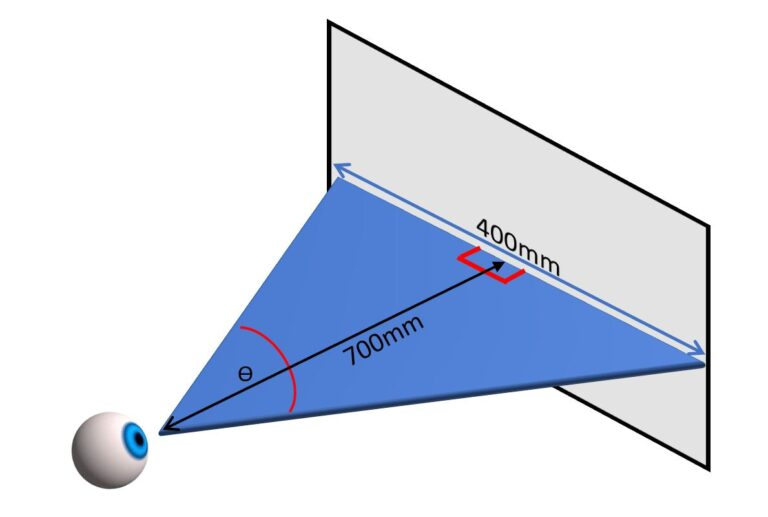

In [13]:
display.Image("https://www.sr-research.com/wp-content/uploads/2019/11/DegsofVABlog4-768x517.jpg")

We know this about our data:
- Samplerate was 120hz (alternating 60hz per eye).
- Screen resolution was 1280 x 1024 (px).
- Screen size was 33.97 x 27.31 (cm).
- Viewing distance was 58.74 (cm).
- Vertical viewing offset was 4.55 (cm).
Source: https://github.com/RyanHope/gazetools/blob/master/man/lc120.Rd


In [14]:
screen_size_mm = np.array([52.0, 27.31])*10
screen_size_px = np.array([1920, 1080])
viewing_distance_mm = 70*10

In [15]:
screen_size_mm = np.array([33.97, 27.31])*10
screen_size_px = np.array([1280, 1024])
viewing_distance_mm = 58.74*10

In [16]:
pixel_on_the_screen_to_wide = np.divide(screen_size_mm,screen_size_px)
pixel_on_the_screen_to_wide

array([0.26539062, 0.26669922])

In [17]:
# θ = .arctan((x Or y *pixel_on_the_screen_to_wide)/viewing_distance_mm) 

# Convert the gaze position to degrees of visual angle
df["x_deg"] = np.arctan((df["x"]*pixel_on_the_screen_to_wide[0]) / viewing_distance_mm) * 180 / np.pi
df["y_deg"] =np.arctan((df["y"]*pixel_on_the_screen_to_wide[0]) / viewing_distance_mm) * 180 / np.pi

# Calculate the movement between consecutive samples in degrees of visual angle
df["dx_deg"] = df["x_deg"].diff()
df["dy_deg"] = df["y_deg"].diff()

# Calculate the movement distance in degrees of visual angle
# eye movement distance = sqrt(x^2 + y^2)
df["movement_distance"] = np.sqrt(df["dx_deg"]**2 + df["dy_deg"]**2)



In [18]:
df.head()

,status,pupil,x,y,field,timestamp,x_deg,y_deg,dx_deg,dy_deg,movement_distance
0,1,38,481,411,1,216703.0,12.260791,10.519556,NaN,NaN,NaN
1,1,34,481,409,0,216714.0,12.260791,10.469501,0.000000,-0.050056,0.050056
2,1,38,479,421,1,216726.0,12.211343,10.769589,-0.049448,0.300088,0.304135
3,1,34,478,413,0,216736.0,12.186613,10.569596,-0.024731,-0.199993,0.201517
4,1,38,477,412,1,216748.0,12.161877,10.544578,-0.024735,-0.025018,0.035181


In [19]:
# Set a threshold for fixation detection (200-400ms and less than 2 degrees of movement)
min_duration = 200
max_duration = 400
max_movement_deg = 2.0

# Identify fixations by clustering consecutive samples that meet the threshold criteria
fixations = []
fixation_start = None
for i, row in df.iterrows():
    if fixation_start is None:
        if row["movement_distance"] <= max_movement_deg:
            fixation_start = row["timestamp"]
    else:
        if row["movement_distance"] > max_movement_deg:
            fixation_duration = row["timestamp"] - fixation_start
            if min_duration <= fixation_duration <= max_duration:
                fixation = {
                    "start": fixation_start,
                    "end": row["timestamp"],
                    "duration": fixation_duration,
                    "x": df.loc[i-1, "x"],
                    "y": df.loc[i-1, "y"],
                    "x_deg": df.loc[i-1, "x_deg"],
                    "y_deg": df.loc[i-1, "y_deg"],
                }
                fixations.append(fixation)
            fixation_start = None

# Convert the fixations list to a pandas DataFrame
fixations_df = pd.DataFrame(fixations)

In [20]:
len(fixations_df)

161

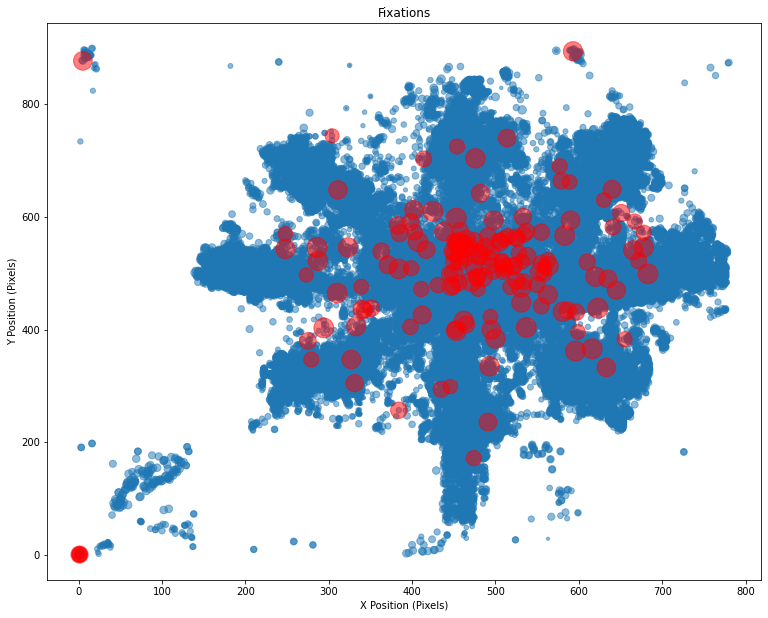

In [21]:
# Plot the gaze data as a scatter plot
plt.figure(figsize=(1280/100, 1024/100))
plt.scatter(df["x"], df["y"], s=df['pupil'], alpha=0.5)

# Plot the fixations as red dots
plt.scatter(fixations_df["x"], fixations_df["y"], s=fixations_df["duration"], color="red", alpha=0.5)

# Set the plot title and axis labels
plt.title("Fixations")
plt.xlabel("X Position (Pixels)")
plt.ylabel("Y Position (Pixels)")

plt.show()